In [2]:
import numpy as np
import os
import pydicom
import matplotlib.pyplot as plt

In [64]:
def find_roi_coordinates(pixel_array):
    # Pixel array'deki beyaz piksellerin konumlarını bul
    white_pixels = np.where(pixel_array == 255)

    # ROI'nin koordinatlarını hesapla
    x_min = np.min(white_pixels[1])
    x_max = np.max(white_pixels[1])
    y_min = np.min(white_pixels[0])
    y_max = np.max(white_pixels[0])

    # ROI'nin merkez koordinatlarını ve boyutlarını hesapla
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    print("ROI max ve min coordinatlar", " xmin: ", x_min, " xmax: ", x_max, " ymin: ", y_min, " ymax: ", y_max)
    print(pixel_array.shape)
    return x_center, y_center, width, height


# Örnek bir DICOM dosyasını yükle
ds = pydicom.dcmread("C:/Users/alt_user/Desktop/data/yolo için deneme raw imagelar/38_left_cc_roi.dcm")

# Pixel array'i al
pixel_array = ds.pixel_array

# ROI'nin koordinatlarını bul
x_center, y_center, width, height = find_roi_coordinates(pixel_array)

# Doğruluğu kontrol etmek için çıktıları yazdır
print("ROI Merkez Koordinatları (x, y):", x_center, y_center)
print("ROI Boyutları (Genişlik, Yükseklik):", width, height)



ROI max ve min coordinatlar  xmin:  288  xmax:  512  ymin:  1976  ymax:  2184
(4616, 3016)
ROI Merkez Koordinatları (x, y): 400.0 2080.0
ROI Boyutları (Genişlik, Yükseklik): 224 208


In [134]:
ds = pydicom.dcmread("C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/TestData/Calc-Test_P_00038_RIGHT_CC/raw.dcm",force=True)
pixel_array = ds.pixel_array
print(type(pixel_array))
print(pixel_array.shape)
pixel_array

<class 'numpy.ndarray'>
(4688, 2744)


array([[37957, 37869, 37297, ..., 65535, 65535, 65535],
       [37319, 37209, 37385, ..., 65535, 65535, 65535],
       [37033, 37209, 37011, ..., 65535, 65535, 65535],
       ...,
       [    0,     0,     0, ..., 65535, 65535, 65535],
       [    0,     0,     0, ..., 65535, 65535, 65535],
       [    0,     0,     0, ..., 65535, 65535, 65535]], dtype=uint16)

In [10]:
def get_file_names_in_folder(folder_path):
    file_names = []
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_names.append(file_name)
    return file_names

folder_path = 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/TestData'  # Replace this with the path to your folder
# file_names = get_file_names_in_folder(folder_path)
print(os.listdir(os.path.join(folder_path, "Calc-Test_P_00038_RIGHT_CC")))

['desktop.ini', 'raw.dcm']


In [15]:
def change_filename(old_filename, new_filename):
    try:
        os.rename(old_filename, new_filename)
        print(f"File name changed from '{old_filename}' to '{new_filename}' successfully.")
    except FileNotFoundError:
        print(f"File '{old_filename}' not found.")
    except FileExistsError:
        print(f"A file with the name '{new_filename}' already exists.")


def change_file_names_in_folder(folder_path):
    for file_name in os.listdir(folder_path):
        for file in os.listdir(os.path.join(folder_path, file_name)):
            if file=="raw.dcm":
                folder=os.path.join(folder_path, file_name)
                change_filename(os.path.join(folder, file), os.path.join(folder, file_name+".dcm"))
                # print(os.path.join(folder, file))

folder_path = 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training'
change_file_names_in_folder(folder_path)

File name changed from 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training\Calc-Training_P_00014_LEFT_MLO\raw.dcm' to 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training\Calc-Training_P_00014_LEFT_MLO\Calc-Training_P_00014_LEFT_MLO.dcm' successfully.
File name changed from 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training\Calc-Training_P_00182_LEFT_CC\raw.dcm' to 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training\Calc-Training_P_00182_LEFT_CC\Calc-Training_P_00182_LEFT_CC.dcm' successfully.
File name changed from 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training\Calc-Training_P_00185_LEFT_CC\raw.dcm' to 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training\Calc-Training_P_00185_LEFT_CC\Calc-Training_P_00185_LEFT_CC.dcm' successfully.
File name changed from 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training\Calc-Training_P_00268_LEFT_MLO\raw.dcm' to 'C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_d

In [22]:
def change_file_directory(file_path, new_directory):
    try:

        print(f"File moved to {new_directory} successfully.")
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except PermissionError:
        print("Permission denied to move the file.")

def change_file_dir(folder_path):
    for file_name in os.listdir(folder_path):
        for file in os.listdir(os.path.join(folder_path, file_name)):
            if file.find(".dcm")!=-1:
                folder=os.path.join(folder_path, file_name)
                try:
                    os.rename(os.path.join(folder, file), os.path.join(folder_path, file))
                    print("File moved successfully.")
                except FileNotFoundError:
                    print("File not found.")
                except PermissionError:
                    print("Permission denied to move the file.")

folder_path="C:/Users/alt_user/Desktop/yolohelper/DICOM_Converter/DICOM"
change_file_dir(folder_path)

File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.
File moved successfully.


In [3]:
def show_dicom_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.dcm'):
            filepath = os.path.join(folder_path, filename)
            dicom_data = pydicom.dcmread(filepath, force=True)
            plt.imshow(dicom_data.pixel_array, cmap=plt.cm.gray)
            plt.title(filename)
            plt.show()


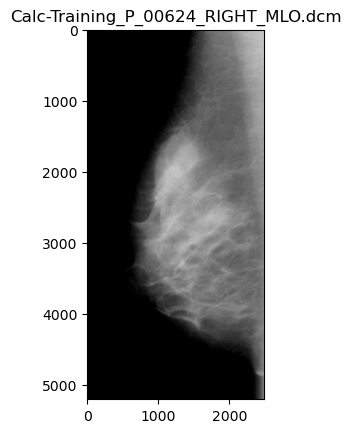

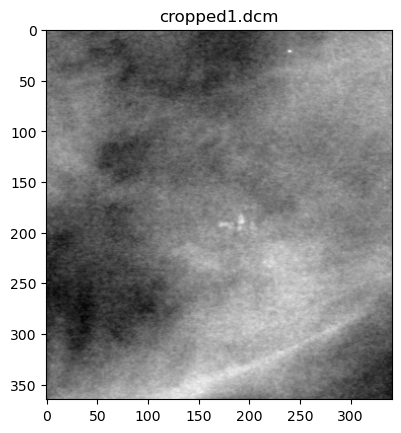

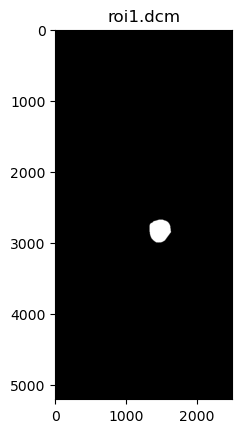

In [4]:
show_dicom_images("C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/trainDicom/Calc-Training_P_00624_RIGHT_MLO")
show_dicom_images("C:/Users/alt_user/Desktop/yolohelper/yolo_deneme_data/Training/Calc-Training_P_00624_RIGHT_MLO_1")

In [1]:
import pandas as pd

In [2]:
calcDf=pd.read_csv("yolo_deneme_data/sampled_calc_df.csv").drop(columns=["cropped image file path","roi_cropped_folder_column","ROI mask file path"])

calcDf.head()

,patient_id,abnormality type,assessment,image file path,raw_folder_column,ROI coordinates
0,P_00624,calcification,0,Calc-Training_P_00624_RIGHT_MLO/raw.dcm,Calc-Training_P_00624_RIGHT_MLO,"[1481.0, 2844.0, 300, 324]"
1,P_02220,calcification,0,Calc-Training_P_02220_LEFT_MLO/raw.dcm,Calc-Training_P_02220_LEFT_MLO,"[326.0, 3668.0, 512, 452]"
2,P_02159,calcification,0,Calc-Test_P_02159_LEFT_CC/raw.dcm,Calc-Test_P_02159_LEFT_CC,"[1352.0, 1694.0, 340, 340]"
3,P_02563,calcification,0,Calc-Training_P_02563_RIGHT_MLO/raw.dcm,Calc-Training_P_02563_RIGHT_MLO,"[2841.0, 1966.0, 388, 360]"
4,P_02419,calcification,0,Calc-Training_P_02419_LEFT_MLO/raw.dcm,Calc-Training_P_02419_LEFT_MLO,"[406.0, 3926.0, 544, 1064]"


In [3]:
def find(x:str):
    return x.find("Training")!=-1
codes=calcDf["image file path"].apply(func=find)
trainDfCalc=calcDf[codes]
trainDfCalc.info() #81
testDfCalc=calcDf[(codes-1).astype(bool)]
testDfCalc.info() #19
# calcDf["image file path"][0]


<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   patient_id         81 non-null     object
 1   abnormality type   81 non-null     object
 2   assessment         81 non-null     int64 
 3   image file path    81 non-null     object
 4   raw_folder_column  81 non-null     object
 5   ROI coordinates    81 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2 to 95
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   patient_id         19 non-null     object
 1   abnormality type   19 non-null     object
 2   assessment         19 non-null     int64 
 3   image file path    19 non-null     object
 4   raw_folder_column  19 non-null     object
 5   ROI coordinates    19 non-null     object
dtyp

In [4]:
massDf=pd.read_csv("yolo_deneme_data/sampled_mass_df.csv").drop(columns=["cropped image file path","roi_cropped_folder_column","ROI mask file path"])
massDf

,patient_id,abnormality type,assessment,image file path,raw_folder_column,ROI coordinates
0,P_00108,mass,0,Mass-Training_P_00108_LEFT_MLO/raw.dcm,Mass-Training_P_00108_LEFT_MLO,"[909.0, 3409.5, 206, 157]"
1,P_00065,mass,0,Mass-Training_P_00065_LEFT_CC/raw.dcm,Mass-Training_P_00065_LEFT_CC,"[1486.5, 2568.5, 369, 331]"
2,P_00457,mass,0,Mass-Test_P_00457_LEFT_MLO/raw.dcm,Mass-Test_P_00457_LEFT_MLO,"[1349.5, 3901.5, 339, 375]"
3,P_00055,mass,0,Mass-Training_P_00055_LEFT_CC/raw.dcm,Mass-Training_P_00055_LEFT_CC,"[1150.5, 2782.0, 397, 432]"
4,P_00922,mass,0,Mass-Test_P_00922_RIGHT_MLO/raw.dcm,Mass-Test_P_00922_RIGHT_MLO,"[1604.5, 2145.5, 693, 557]"
...,...,...,...,...,...,...
95,P_00110,mass,5,Mass-Training_P_00110_LEFT_MLO/raw.dcm,Mass-Training_P_00110_LEFT_MLO,"[2155.5, 3166.5, 893, 823]"
96,P_01204,mass,5,Mass-Test_P_01204_RIGHT_MLO/raw.dcm,Mass-Test_P_01204_RIGHT_MLO,"[1521.0, 2019.0, 514, 550]"
97,P_00987,mass,5,Mass-Test_P_00987_LEFT_CC/raw.dcm,Mass-Test_P_00987_LEFT_CC,"[912.0, 2626.5, 636, 613]"
98,P_01119,mass,5,Mass-Test_P_01119_LEFT_MLO/raw.dcm,Mass-Test_P_01119_LEFT_MLO,"[2048.5, 2294.0, 381, 380]"


In [5]:
codes=massDf["image file path"].apply(func=find)
trainDfMass=massDf[codes]
testDfMass=massDf[(codes-1).astype(bool)]
testDfMass.info() #45
trainDfMass.info() #55

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 2 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   patient_id         45 non-null     object
 1   abnormality type   45 non-null     object
 2   assessment         45 non-null     int64 
 3   image file path    45 non-null     object
 4   raw_folder_column  45 non-null     object
 5   ROI coordinates    45 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 95
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   patient_id         55 non-null     object
 1   abnormality type   55 non-null     object
 2   assessment         55 non-null     int64 
 3   image file path    55 non-null     object
 4   raw_folder_column  55 non-null     object
 5   ROI coordinates    55 non-null     object
dtyp

In [6]:
trainDfCalc.iloc[1:4,:]

,patient_id,abnormality type,assessment,image file path,raw_folder_column,ROI coordinates
1,P_02220,calcification,0,Calc-Training_P_02220_LEFT_MLO/raw.dcm,Calc-Training_P_02220_LEFT_MLO,"[326.0, 3668.0, 512, 452]"
3,P_02563,calcification,0,Calc-Training_P_02563_RIGHT_MLO/raw.dcm,Calc-Training_P_02563_RIGHT_MLO,"[2841.0, 1966.0, 388, 360]"
4,P_02419,calcification,0,Calc-Training_P_02419_LEFT_MLO/raw.dcm,Calc-Training_P_02419_LEFT_MLO,"[406.0, 3926.0, 544, 1064]"


In [7]:
trainDfCalc.iloc[0,5][1:-1].replace(" ","").split(",")

['1481.0', '2844.0', '300', '324']

In [9]:
float("10.34")

10.34

In [8]:
from PIL import Image

def get_image_size(file_path):
    try:
        with Image.open(file_path) as img:
            width, height = img.size
            return width, height
    except IOError:
        print(f"Unable to open image file: {file_path}")

In [12]:
def yoloFormat(df:pd.DataFrame,folder:str):   
    for rowIndex in range(0,len(df)):
        fileName=df.iloc[rowIndex,4]
        print(fileName)
        widthR, heightR=get_image_size(folder+"/images/"+fileName+".jpg")

        bi_rads=df.iloc[rowIndex,2]
        x_center, y_center, width, height = df.iloc[rowIndex,5][1:-1].replace(" ","").split(",")
        
        print(bi_rads, x_center, y_center, width, height)
        with open("C:/Users/alt_user/Desktop/yolohelper/"+folder+"/labels/"+fileName+'.txt', 'a') as file:
            file.write(str(0)+" "+ str(float(x_center)/widthR) +" " + str(float(y_center)/heightR)+" " + str(float(width)/widthR)+ " " + str(float(height)/heightR)+"\n")



In [13]:
yoloFormat(trainDfCalc,"YOLO_withoutclassification/train")
yoloFormat(trainDfMass,"YOLO_withoutclassification/train")

Calc-Training_P_00624_RIGHT_MLO
0 1481.0 2844.0 300 324
Calc-Training_P_02220_LEFT_MLO
0 326.0 3668.0 512 452
Calc-Training_P_02563_RIGHT_MLO
0 2841.0 1966.0 388 360
Calc-Training_P_02419_LEFT_MLO
0 406.0 3926.0 544 1064
Calc-Training_P_00624_RIGHT_CC
0 1789.0 2785.0 272 300
Calc-Training_P_02316_RIGHT_MLO
0 2642.0 3129.0 580 460
Calc-Training_P_02154_LEFT_CC
0 160.0 2313.0 268 304
Calc-Training_P_01197_LEFT_MLO
0 1514.0 2702.0 480 496
Calc-Training_P_02489_RIGHT_MLO
0 852.0 2845.0 580 476
Calc-Training_P_00182_LEFT_CC
0 1168.0 1616.0 420 356
Calc-Training_P_02419_LEFT_CC
0 610.0 3611.0 632 624
Calc-Training_P_01019_LEFT_CC
0 1298.0 2552.0 520 580
Calc-Training_P_02368_RIGHT_CC
0 2662.0 2234.0 368 404
Calc-Training_P_02584_LEFT_CC
0 280.0 4618.0 524 488
Calc-Training_P_02195_RIGHT_MLO
0 1764.5 1940.0 431 684
Calc-Training_P_02409_RIGHT_MLO
0 1660.0 2747.0 544 584
Calc-Training_P_02348_RIGHT_MLO
0 2301.0 5032.0 1124 948
Calc-Training_P_01691_RIGHT_MLO
2 2032.0 3452.0 64 72
Calc-Training

In [14]:
yoloFormat(testDfCalc,"YOLO_withoutclassification/test")
yoloFormat(testDfMass,"YOLO_withoutclassification/test")

Calc-Test_P_02159_LEFT_CC
0 1352.0 1694.0 340 340
Calc-Test_P_02102_LEFT_MLO
0 956.0 3979.0 1772 1024
Calc-Test_P_02153_RIGHT_MLO
0 1817.0 3868.0 472 408
Calc-Test_P_00077_LEFT_CC
2 1627.5 2480.0 73 64
Calc-Test_P_00077_LEFT_MLO
2 1828.0 3212.0 72 104
Calc-Test_P_00041_LEFT_CC
2 2072.0 1256.0 96 80
Calc-Test_P_00077_RIGHT_MLO
2 1552.0 2140.0 192 200
Calc-Test_P_00038_RIGHT_CC
2 2420.0 1208.0 632 368
Calc-Test_P_00562_LEFT_CC
2 860.0 3220.0 56 56
Calc-Test_P_01643_RIGHT_MLO
3 2060.0 1664.0 296 256
Calc-Test_P_01253_RIGHT_MLO
3 2272.5 3318.0 495 600
Calc-Test_P_01842_LEFT_MLO
4 2068.0 3508.0 264 256
Calc-Test_P_00646_LEFT_CC
4 2062.0 2854.5 670 505
Calc-Test_P_01414_RIGHT_MLO
4 1104.0 3332.0 424 432
Calc-Test_P_00679_LEFT_CC
4 184.0 1744.0 176 128
Calc-Test_P_00879_RIGHT_CC
5 796.0 1921.0 320 304
Calc-Test_P_01803_RIGHT_MLO
5 1768.0 1672.0 544 640
Calc-Test_P_00485_LEFT_CC
5 1444.0 4960.0 360 416
Calc-Test_P_01067_LEFT_CC
5 160.0 3571.5 320 295
Mass-Test_P_00457_LEFT_MLO
0 1349.5 3901.5 

In [124]:
trainDfMass.groupby("patient_id").count().head()

,abnormality type,assessment,image file path,raw_folder_column,ROI coordinates
patient_id,,,,,
P_00009,2,2,2,2,2
P_00034,1,1,1,1,1
P_00041,1,1,1,1,1
P_00055,1,1,1,1,1
P_00065,1,1,1,1,1


In [127]:
testDfMass.groupby("patient_id").count().head()

,abnormality type,assessment,image file path,raw_folder_column,ROI coordinates
patient_id,,,,,
P_00032,1,1,1,1,1
P_00037,1,1,1,1,1
P_00147,1,1,1,1,1
P_00200,2,2,2,2,2
P_00238,1,1,1,1,1
